# Lab 04: Part 2
# Bootstrap of a regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model

## 1. Building a linear model

In [2]:
# Data: 1000 births from North Carolina
# https://www.openintro.org/stat/data/?data=nc
# We are interested in the link between 
# Weeks: gestation time (length of the pregnancy in weeks) 
# Weigh: Birth weight im pounds
D = pd.read_csv("nc.csv")
display(D)

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,47.0,42,mature mom,40.0,full term,10.0,not married,26.0,8.44,not low,male,nonsmoker,not white
996,34.0,42,mature mom,38.0,full term,18.0,not married,20.0,6.19,not low,female,nonsmoker,white
997,39.0,45,mature mom,40.0,full term,15.0,not married,32.0,6.94,not low,female,nonsmoker,white
998,55.0,46,mature mom,31.0,premie,8.0,not married,25.0,4.56,low,female,nonsmoker,not white


In [3]:
# Check for missing data and exclude observations
print("Number of NaN:",sum(np.isnan(D.weeks)))
D = D[~np.isnan(D.weeks)]

Number of NaN: 2


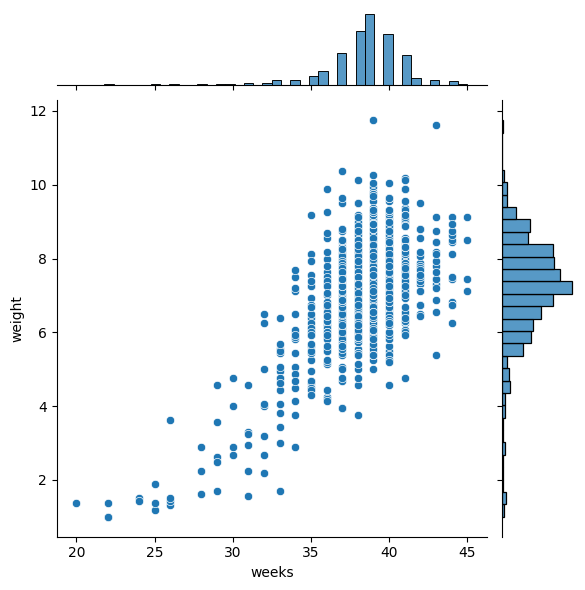

In [4]:
# Make a Joint plot between weeks and weight
sns.jointplot(data=D,x='weeks',y='weight')

In [5]:
# Train a model on the training set and plot the fit 
regr = sklearn.linear_model.LinearRegression()
X_fit = np.c_[D.weeks,D.weeks**2,D.weeks**3]
regr.fit(X_fit,D.weight)
regr.coef_

array([-5.21866875e+00,  1.78832738e-01, -1.85596626e-03])

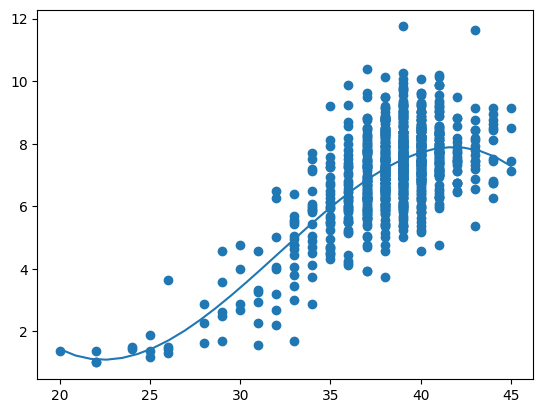

In [6]:
# Plot the Fit of model 
plt.scatter(D.weeks,D.weight)
p_weeks = np.linspace(20,45,30)
X_pred = np.c_[p_weeks,p_weeks**2,p_weeks**3]
p_weight=regr.predict(X_pred)
plt.plot(p_weeks,p_weight)


## 2. Bootstrap the model parameters

In [7]:
# Write a Bootstrap function that records the fitted models 
def BootstrapCoef(data):
    numboot = 1000
    n = len(data)
    theta = np.zeros((numboot,3))    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_fit = np.c_[d.weeks,d.weeks**2,d.weeks**3]
        regr.fit(X_fit,d.weight)
        theta[i,:]=regr.coef_
    return theta

In [8]:
# Get 1000 Bootstrap fits

thetaBS = BootstrapCoef(D)

In [9]:
thetaBS

array([[-5.73426950e+00,  1.93486791e-01, -1.99147443e-03],
       [-2.67584202e+00,  1.05810411e-01, -1.16796467e-03],
       [-4.79525436e+00,  1.65840289e-01, -1.72587041e-03],
       ...,
       [-4.16408107e+00,  1.46443826e-01, -1.53166247e-03],
       [-5.29572582e+00,  1.81726809e-01, -1.88917560e-03],
       [-5.43670933e+00,  1.84947493e-01, -1.90931683e-03]])

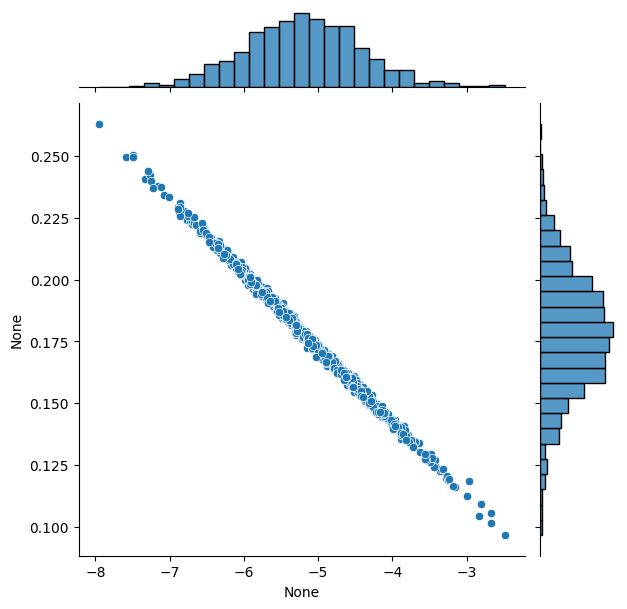

In [10]:
# Make a joint plot of two parameters 
sns.jointplot(x=thetaBS[:,0],y=thetaBS[:,1])

## 3. Bootstrap the model prediction

In [11]:
# Write a Bootstrap function that records the fitted models 
def BootstrapPred(data,xp):
    numboot = 1000
    n = len(data)
    X_pred = np.c_[xp,xp**2,xp**3]
    y_pred = np.zeros((numboot,X_pred.shape[0]))    

    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_fit = np.c_[d.weeks,d.weeks**2,d.weeks**3]
        regr.fit(X_fit,d.weight)
        y_pred[i,:]=regr.predict(X_pred)
    return y_pred

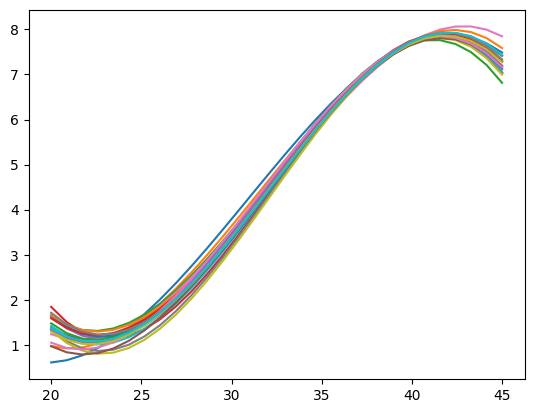

In [12]:
# Plot 20 of the bootstrapped predictions 
y_pred = BootstrapPred(D,p_weeks)

for i in range(20):
    plt.plot(p_weeks,y_pred[i,:])

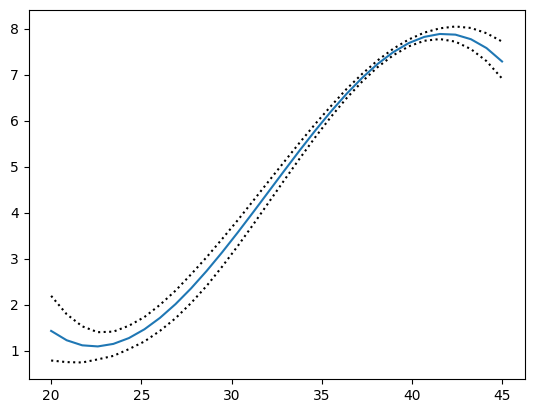

In [13]:
# Caluculate upper and lower confidence bounds for prediction 
# From Bootstrapped means 
upper=np.quantile(y_pred-p_weight,0.975,axis=0)
lower=np.quantile(y_pred-p_weight,0.025,axis=0)
plt.plot(p_weeks,p_weight)
plt.plot(p_weeks,p_weight-upper,'k:')
plt.plot(p_weeks,p_weight-lower,'k:')